General notes:<br>
&nbsp; &nbsp; &nbsp; &nbsp; 1) Collapse some of the cells in groups.<br>
&nbsp; &nbsp; &nbsp; &nbsp; 1.1) If cells are not directly answering a question, collapse them togheter.<br>
&nbsp; &nbsp; &nbsp; &nbsp; 2) Add Markdown to identify sections<br>
&nbsp; &nbsp; &nbsp; &nbsp; 3) Review all comments <br>
&nbsp; &nbsp; &nbsp; &nbsp; 4) Add precision to all columns, graphics and tables to explain the variables or labels if needed <br>
&nbsp; &nbsp; &nbsp; &nbsp; 5) Standardiser les labels pour s'assurer qu'ils matchs ceux donnes dans le document

**Partie 1. Analyse préliminaire (20 points)**

Définissons la série $y_t = log(100\times USDCAD_t) pour le reste de ce travail.<br>
**1.a) Chargez les données et ne gardez que les observations jusqu'à décembre 2019. Tracez la série
brute
avec des étiquettes sur chaque axe et un titre 'log(100 USDCAD=x)'. La dimension temporelle
doit apparaître sur l'axe des abscisses.**

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResultsWrapper
from arch import arch_model
# Deactivate warnings
import warnings
warnings.filterwarnings('ignore')
# set figure size for all plots
plt.rcParams["figure.figsize"] = (15, 6)

In [137]:
df = pd.read_csv("data_W2023.csv")
df.columns = ["date", "USDCAD"]

In [138]:
df = df[df["date"] < "2020-01-01"]
df["date"] = pd.to_datetime(df["date"])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    564 non-null    datetime64[ns]
 1   USDCAD  564 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.2 KB


In [140]:
df["log_100_USDCAD"] = np.log(100 * df["USDCAD"])

In [141]:
df.tail()

,date,USDCAD,log_100_USDCAD
559,2019-08-01,1.028977,4.633736
560,2019-09-01,1.023574,4.628470
561,2019-10-01,1.022401,4.627324
562,2019-11-01,1.024087,4.628971
563,2019-12-01,1.018995,4.623987


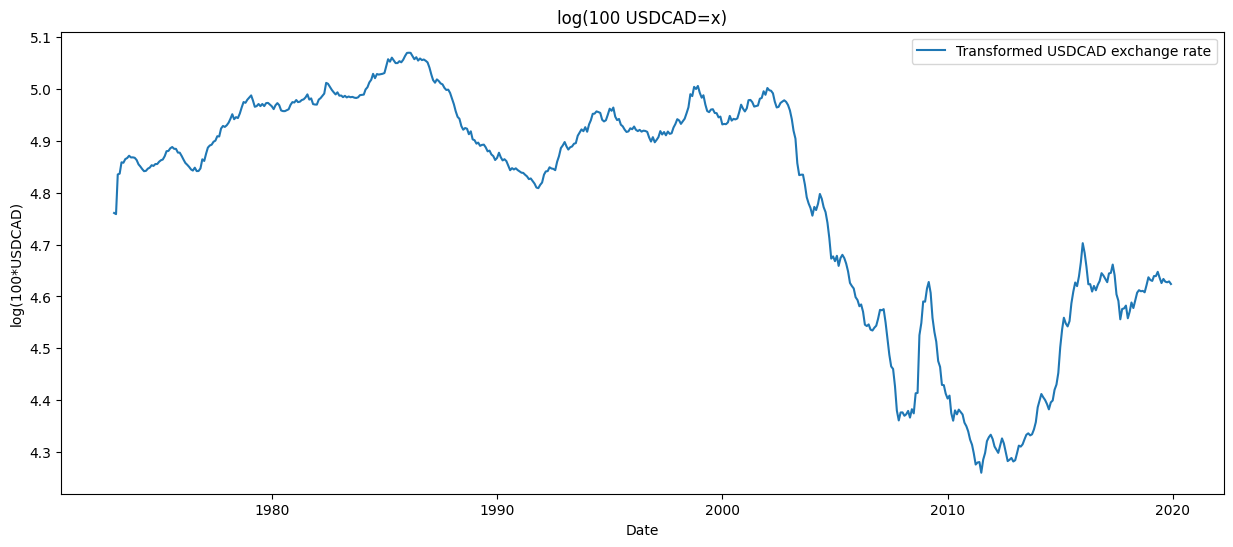

In [142]:
plt.plot(df["date"], df["log_100_USDCAD"])
plt.xlabel("Date")
plt.ylabel(f"log(100*USDCAD)")
plt.title("log(100 USDCAD=x)")
plt.legend(["Transformed USDCAD exchange rate"])

**1.b) Supposons qu'il existe une tendance temporelle déterministe (polynôme d'ordre 2) : $\tau_t = \alpha + \beta*t + \gamma*t^{2}$.<br>
Appliquez la transformation requise pour stationnariser la série logarithmique (le logarithme du taux de
change) et tracez la série résultante.**

In [143]:
Y = df["log_100_USDCAD"].values
print(Y.shape)
print(Y)

(564,)
[4.7610422  4.75884533 4.83534151 4.83696236 4.85877396 4.85794385
 4.86497037 4.86707798 4.87145092 4.86817975 4.86835547 4.86749507
 4.86320854 4.85478901 4.85091538 4.84581827 4.84167668 4.84228522
 4.84644672 4.84848022 4.85316086 4.85182805 4.85548985 4.85544228
 4.85997348 4.86289664 4.86413107 4.87055681 4.88017561 4.8807804
 4.8858553  4.88827616 4.88482142 4.88472306 4.87757635 4.87739232
 4.87106498 4.86384534 4.85758098 4.85394387 4.84997435 4.84505172
 4.84287616 4.84841198 4.84185812 4.8419881  4.84704538 4.86453914
 4.86143057 4.87582441 4.88709521 4.89120475 4.89277253 4.89848857
 4.90055933 4.90911375 4.90862979 4.92401123 4.92888778 4.9270907
 4.93025189 4.93536009 4.94246508 4.95157326 4.94192286 4.94594532
 4.94413975 4.95288475 4.9648376  4.97506984 4.97359646 4.97956012
 4.98366804 4.98786964 4.97836422 4.96592048 4.96721697 4.97128921
 4.96718653 4.97134245 4.96717208 4.97294587 4.97343673 4.97010811
 4.96695986 4.96141334 4.96871977 4.97297811 4.96895876 4

In [144]:
T = len(Y)
T

564

In [145]:
trend = np.arange(1, T + 1)
print("Shape of the trend array:",trend.shape)
ones = np.ones(T)
print("Shape of the ones array:",trend.shape)

Shape of the trend array: (564,)
Shape of the ones array: (564,)


In [146]:
X = np.column_stack((ones, trend, trend ** 2))
print("Shape of the X array:", X.shape)
print(X)

Shape of the X array: (564, 3)
[[1.00000e+00 1.00000e+00 1.00000e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00]
 [1.00000e+00 3.00000e+00 9.00000e+00]
 ...
 [1.00000e+00 5.62000e+02 3.15844e+05]
 [1.00000e+00 5.63000e+02 3.16969e+05]
 [1.00000e+00 5.64000e+02 3.18096e+05]]


In [147]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(type(B))
print("Shape of the B array:",B.shape)
print(B)

<class 'numpy.ndarray'>
Shape of the B array: (3,)
[ 4.90909695e+00  7.33070085e-04 -3.06987062e-06]


In [148]:
df["res"] = Y - X @ B
df

,date,USDCAD,log_100_USDCAD,res
0,1973-01-01,1.168677,4.761042,-0.148785
1,1973-02-01,1.166112,4.758845,-0.151705
2,1973-03-01,1.258816,4.835342,-0.075927
3,1973-04-01,1.260858,4.836962,-0.075018
4,1973-05-01,1.288661,4.858774,-0.053912
...,...,...,...,...
559,2019-08-01,1.028977,4.633736,0.276831
560,2019-09-01,1.023574,4.628470,0.274274
561,2019-10-01,1.022401,4.627324,0.275842
562,2019-11-01,1.024087,4.628971,0.280210


Text(0.5, 1.0, 'Determinist trend deviation')

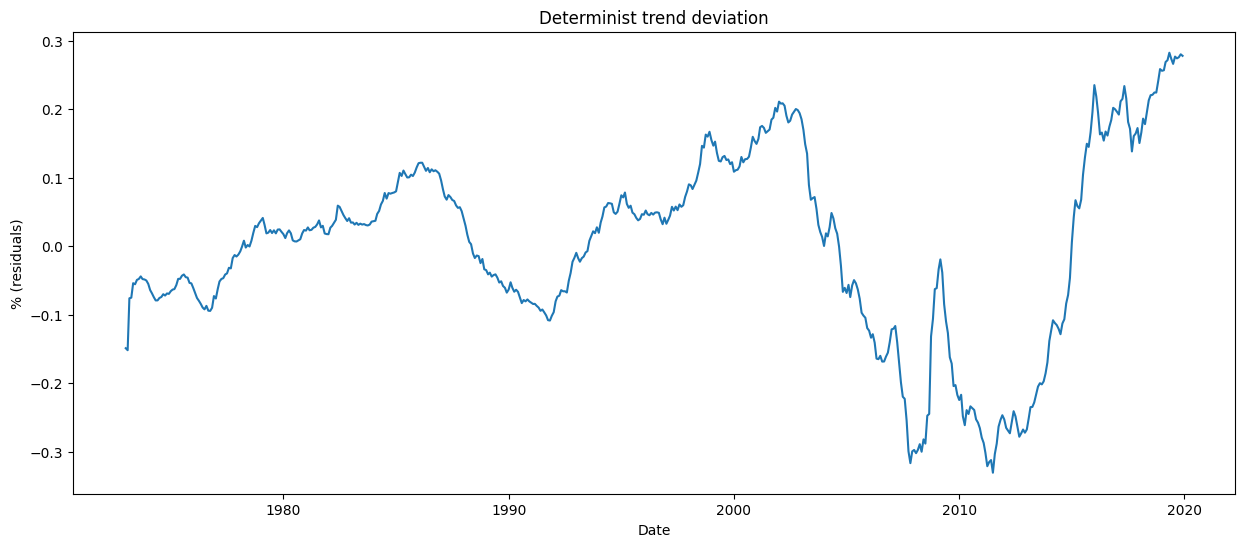

In [149]:
plt.plot(df["date"], df["res"])
plt.xlabel("Date")
plt.ylabel(f"% (residuals)")
plt.title("Determinist trend deviation")

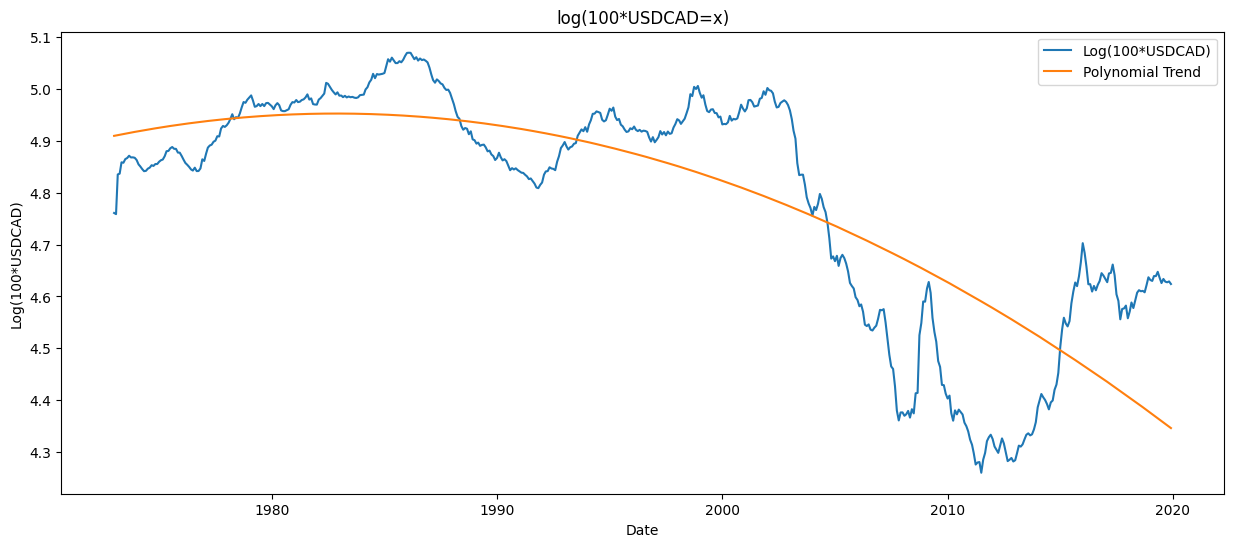

In [150]:
plt.plot(df["date"], df["log_100_USDCAD"], label="Log(100*USDCAD)")
plt.plot(df["date"], X @ B, label="Polynomial Trend")
plt.xlabel("Date")
plt.ylabel(f"Log(100*USDCAD)")
plt.title("log(100*USDCAD=x)")
plt.legend()


**1.c) Supposons qu'il existe une tendance temporelle stochastique, c'est-à-dire une marche aléatoire.<br>
Appliquez la transformation requise pour stationnariser la série logarithmique (le logarithme du taux d'echange) et tracez la série résultante.**

In [151]:
df_stoch = df.copy() #Copy to make first part robust if we run the project out of order
df_stoch["stoch_USDCAD"] = df_stoch["log_100_USDCAD"].diff() * 100
df_stoch.dropna(inplace=True) # drop first row
df_stoch.shape


(563, 5)

In [152]:
df_stoch.head()

,date,USDCAD,log_100_USDCAD,res,stoch_USDCAD
1,1973-02-01,1.166112,4.758845,-0.151705,-0.219688
2,1973-03-01,1.258816,4.835342,-0.075927,7.649618
3,1973-04-01,1.260858,4.836962,-0.075018,0.162085
4,1973-05-01,1.288661,4.858774,-0.053912,2.181160
5,1973-06-01,1.287592,4.857944,-0.055441,-0.083011


Text(0.5, 1.0, 'Hypothesis: stochastic trend')

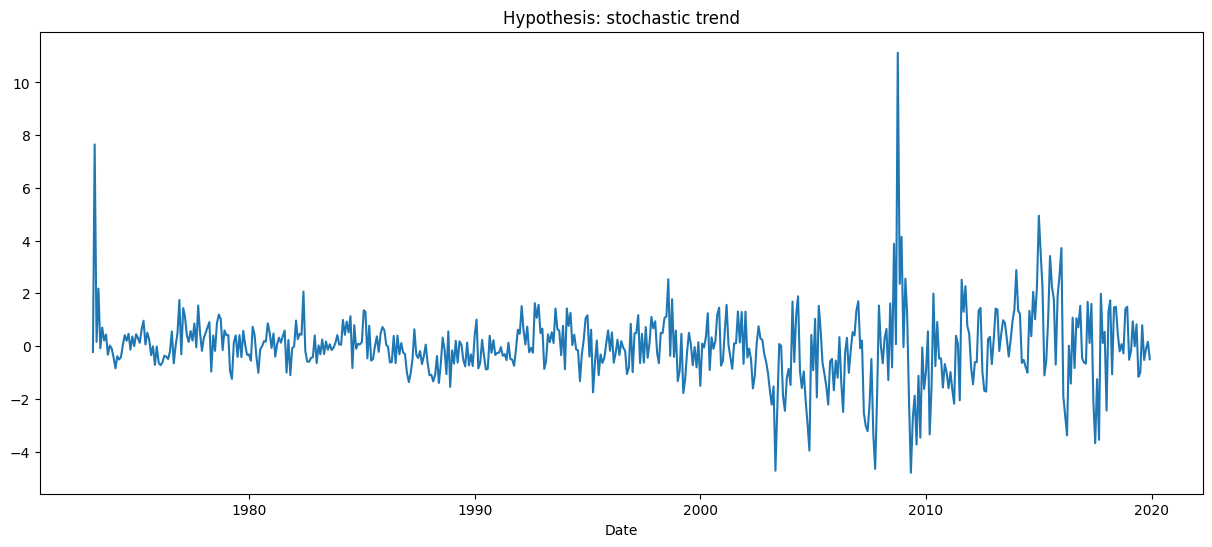

In [153]:
plt.plot(df_stoch["date"], df_stoch["stoch_USDCAD"])
plt.xlabel("Date")
plt.title("Hypothesis: stochastic trend")

**1.c) Supposons qu'il existe une tendance temporelle stochastique, c'est-à-dire une marche aléatoire.<br>
Appliquez la transformation requise pour stationnariser la série logarithmique (le logarithme du taux d'echange) et tracez la série résultante.**

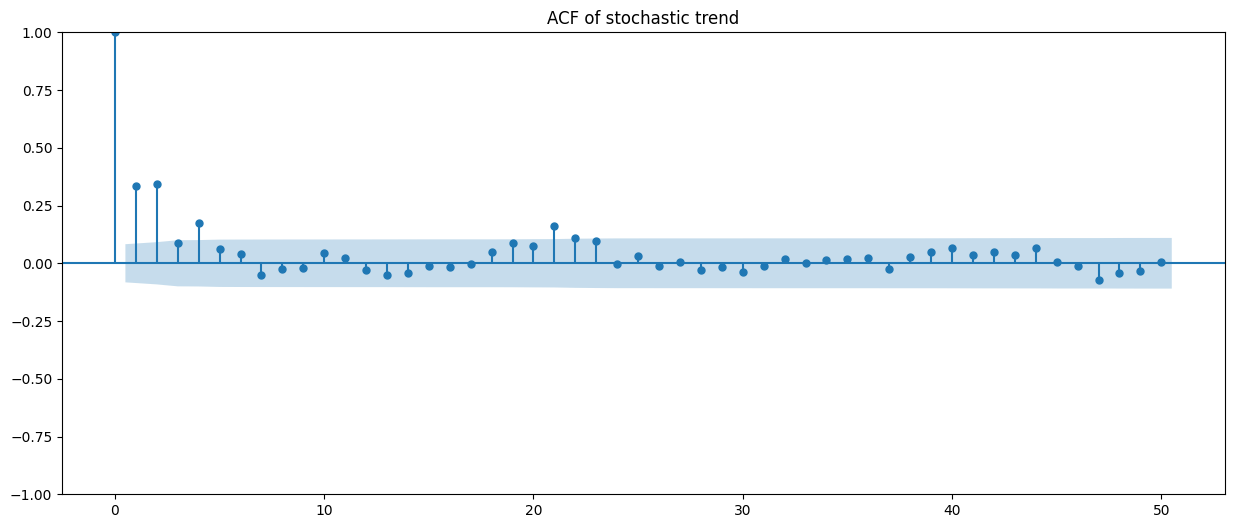

In [154]:
sm.graphics.tsa.plot_acf(df_stoch["stoch_USDCAD"], lags=50, title="ACF of stochastic trend");


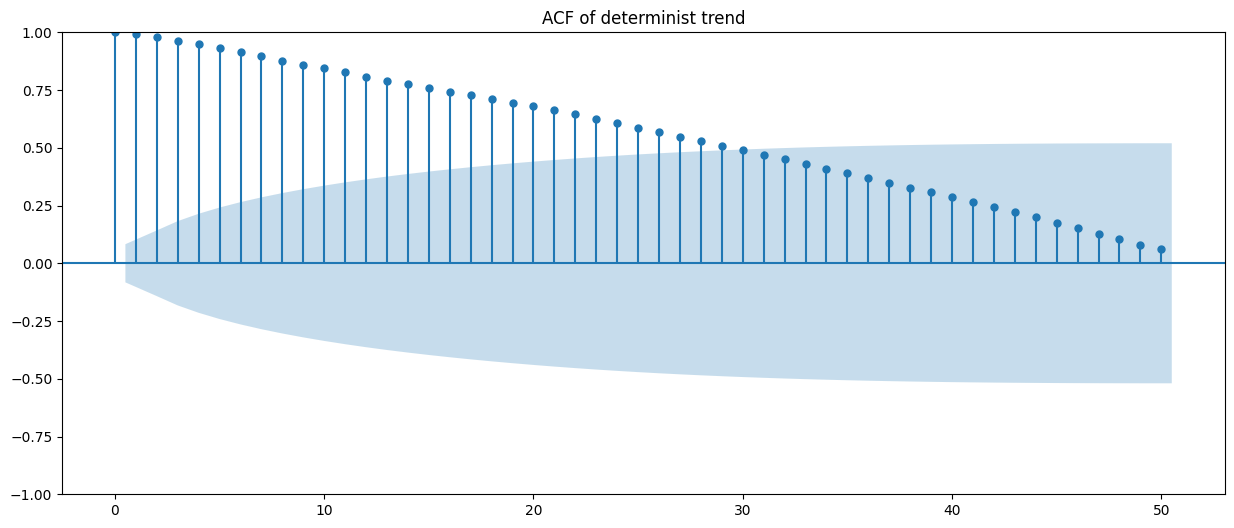

In [155]:
sm.graphics.tsa.plot_acf(df_stoch["res"], lags=50, title="ACF of determinist trend");

**Interpretation**

Pour commencer, on sait que l'autocorrélation non conditionnelle est une mesure de la dépendance temporelle, ce qui nous permet à partir des graphiques d'autocorrélations, de conclure sur la nature stationnaire de la série. On attend d'une série stationnaire des mouvements autour d'une moyenne et de bornes qui sont fixes dans le temps.


- Concernant le graphique des autocorrélations de la tendance déterministe polynomiale, on observe que les autocorrélations tendent lentement vers 0. La moyenne des autocorrélations n'est donc pas nulle. On peut donc conclure que la série `log_100_USDCAD` n'est pas stationnaire.
- D'autre part, on observe que les autocorrélations de la série à tendance stochastique tendent rapidement vers 0 pour les 50 lags testés, avec une moyenne qui à l'air nulle en fonction du nombre de lags.

On sait que tout processus stationnaire est caractérisé par une courte mémoire: $Corr(y_t, y_{t-k}) \rightarrow 0$ lorsque $k$ augmente. On peut donc conclure que la série `stoch_USDCAD` est stationnaire.


**1.e) A partir de maintenant, utilisez exclusivement la série qui est stationnaire. Effectuez les tests de Ljung-Box avec 1 à 18 lags pour vérifier si la série est un bruit blanc et concluez.**

In [156]:
ljung_box_test = sm.stats.acorr_ljungbox(df_stoch["stoch_USDCAD"], lags=18)
ljung_box_test


,lb_stat,lb_pvalue
1,63.837877,1.350911e-15
2,130.932915,3.700656e-29
3,135.330291,3.838951e-29
4,153.014709,4.598552e-32
5,155.108804,1.090679e-31
6,156.108470,3.947901e-31
7,157.514338,1.069480e-30
8,157.903502,4.387614e-30
9,158.157909,1.792324e-29
10,159.368871,4.373649e-29


In [157]:
#Test if the p-value is inferior to a given thresold for every lag between 1 and 18
p_values = [0.10, 0.05, 0.01]

for p in p_values:
    ljung_box_test[f"p = {p}"] = ljung_box_test["lb_pvalue"] < p

ljung_box_test

,lb_stat,lb_pvalue,p = 0.1,p = 0.05,p = 0.01
1,63.837877,1.350911e-15,True,True,True
2,130.932915,3.700656e-29,True,True,True
3,135.330291,3.838951e-29,True,True,True
4,153.014709,4.598552e-32,True,True,True
5,155.108804,1.090679e-31,True,True,True
6,156.108470,3.947901e-31,True,True,True
7,157.514338,1.069480e-30,True,True,True
8,157.903502,4.387614e-30,True,True,True
9,158.157909,1.792324e-29,True,True,True
10,159.368871,4.373649e-29,True,True,True


On rappelle que le test de Ljung-Box permet de tester l'hypothèse nulle d'absence d'autocorrélation pour les termes bruits blancs : $H_0: Corr(y_t, y_{t-k}) = 0$.

On remarque que les `lb_pvalues` (p-values pour le test de Ljung-Box) sont très faibles pour les lags 1 à 18. On peut donc rejeter l'hypothèse nulle d'absence de corrélation pour ces lags au seuil de 5%. On peut donc conclure que les résidus ne sont pas indépendants et que la série est autocorrélée, ce qui implique que le terme d'erreur de la série `stoch_USDCAD` n'est pas bruit blanc.

# Partie 2. Choix du modèle (30 points)

Considérons les 8 modèles suivants :
- AR(1): $y_t = \delta + \phi_1 y_{t-1} + \epsilon_t$
- AR(2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t$
- AR(3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \epsilon_t$
- AR(4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} + \epsilon_t$
- ARMA(1,1): $y_t = \delta + \phi_1 y_{t-1} - \theta_1 \epsilon_{t-1} + \epsilon_t$
- ARMA(2,2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} + \epsilon_t$
- ARMA(3,3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} + \epsilon_t$
- ARMA(4,4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} - \theta_4 \epsilon_{t-4} + \epsilon_t$

In [180]:
def compute_eigenvalues(arma_model: ARIMAResultsWrapper) -> np.ndarray:
    """Compute the eigenvalues of the ARMA model."""

    #Find length of arparams
    arparams = arma_model.arparams # store the AR parameters
    n_ar_params_1 = len(arparams) - 1

    #Make the params into a row array
    param_array = arparams.reshape((1, arparams.shape[0]))

    #Create sub array
    ones = np.ones(n_ar_params_1)
    diag_array = np.diag(ones).reshape((n_ar_params_1, n_ar_params_1))

    #Create array of 0s
    zero_col = np.zeros((n_ar_params_1, 1))

    #Stack array
    sub_array = np.hstack((diag_array, zero_col))
    eigmat = np.vstack((param_array, sub_array))

    return np.linalg.eigvals(eigmat) # compute the eigenvalues of the matrix

In [160]:
def check_stationarity(eigenvalues: np.ndarray) -> bool:
    """Check if the eigenvalues of the ARMA model are inferior to 1."""
    if eigenvalues.dtype == np.complex128: # If eigenvalues are complex, calcul the norm
        a = np.real(eigenvalues)
        b = np.imag(eigenvalues)
        return all(np.sqrt(a**2 + b**2) < 1)
    else: # If eigenvalues are real, check if they are inferior to 1 in absolute value
        return all(np.abs(eigenvalues) < 1)

In [161]:
order_list = [([1], 0, [0]),
               ([1, 2], 0, [0]),
               ([1, 2, 3], 0, [0]),
               ([1, 2, 3, 4], 0, [0]),
               ([1], 0, [1]),
               ([1, 2], 0, [1, 2]),
               ([1, 2, 3], 0, [1, 2, 3]),
               ([1, 2, 3, 4], 0, [1, 2, 3, 4])]


In [162]:
arma_models = {}

for order in order_list:
    print(f"Autoregressive lags: {order[0]}")
    print(f"Moving average lags: {order[2]}")

    model = ARIMA(df_stoch["stoch_USDCAD"], order=order)
    results = model.fit()
    print(results.summary())
    arma_models[f"ARMA({order[0][-1]},{order[2][-1]})"] = results


Autoregressive lags: [1]
Moving average lags: [0]
                               SARIMAX Results                                
Dep. Variable:           stoch_USDCAD   No. Observations:                  563
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -919.472
Date:                Wed, 01 Mar 2023   AIC                           1844.945
Time:                        16:56:39   BIC                           1857.945
Sample:                             0   HQIC                          1850.020
                                - 563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0249      0.086     -0.291      0.771      -0.193       0.143
ar.L1          0.3353      0.031     10.804      0.000       0.274       0.396
si

In [179]:
compute_eigenvalues(arma_models["ARMA(1,1)"])

[[0.72848943]]
[[0.72848943]]


In [59]:
arma_models["ARMA(2,2)"].arparams

array([-0.19709864,  0.42946426])

In [ ]:
df_stationarity = pd.DataFrame(index=arma_models.keys(), columns=["is_stationary"])
for model_name, model in arma_models.items():
    eigenvalues = compute_eigenvalues(model)
    df_stationarity.loc[model_name, "is_stationary"] = check_stationarity(eigenvalues)
df_stationarity

2.b) Effectuez des tests de rapport de vraisemblance pour justifier la sélection de deux modèles. Sélectionnez d'abord le meilleur parmi AR(1), AR(2), AR(3) et AR(4). Sélectionnez ensuite le meilleur modèle parmi ARMA(1,1), ARMA(2,2), ARMA(3,3) et ARMA(4,4). Utilisez le BIC pour justifier la sélection du meilleur de ces deux modèles.

In [ ]:
def compute_lr_statistic(reduced_ll: float, full_ll: float) -> float:
    """Compute the likelihood ratio statistic.
    
    Args: 
        reduced_ll (float): Log likehood of the reduced model.
        full_ll (float): Log likehood of the full model.

    Returns:
        float: The Likehood-Ratio Test Statistics
    """
    return -2 * (reduced_ll - full_ll)

In [ ]:
def compute_p_value_llr(reduced_ll: float, full_ll: float, df: int = 1) -> float:
    """Compute the p-value of the likelihood ratio test.
    
    Args: 
        reduced_ll (float): Log likehood of the reduced model.
        full_ll (float): Log likehood of the full model.
        df (int): Degree of freedom of the Chi-Square test.
    
    Returns:
        float: Returns the p-value of the test. That is the probability that the full model is better than the reduced model.
    """
    lr_statistic = compute_lr_statistic(reduced_ll=reduced_ll, full_ll=full_ll)
    p_val = sp.stats.chi2.sf(lr_statistic, df=df)
    return p_val

On commence par sélectionner le meilleur modèle parmi AR(1), AR(2), AR(3) et AR(4).

- H0: Le modèle complet ARMA(2,0) fit les données aussi bien que le modèle réduit ARMA(1,0). Par conséquent, on devrait choisir le modèle ARMA(1,0) car il est plus simple.
- H1: Le modèle complet ARMA(2,0) fit mieux les données que le modèle réduit ARMA(1,0). Par conséquent, on devrait choisir le modèle ARMA(2,0) car il est plus précis.

In [ ]:
compute_p_value_llr(arma_models["ARMA(1,0)"].llf,
                    arma_models["ARMA(2,0)"].llf,
                    df=1)

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(2,0) fit mieux les données que le modèle ARMA(1,0).

- H0: Le modèle complet ARMA(3,0) fit les données aussi bien que le modèle réduit ARMA(2,0). Par conséquent, on devrait choisir le modèle ARMA(2,0) car il est plus simple.
- H1: Le modèle complet ARMA(3,0) fit mieux les données que le modèle réduit ARMA(2,0). Par conséquent, on devrait choisir le modèle ARMA(3,0) car il est plus précis.

In [ ]:
compute_p_value_llr(arma_models["ARMA(2,0)"].llf,
                    arma_models["ARMA(3,0)"].llf,
                    df=1)

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(3,0) fit mieux les données que le modèle ARMA(2,0).

- H0: Le modèle complet ARMA(4,0) fit les données aussi bien que le modèle réduit ARMA(3,0). Par conséquent, on devrait choisir le modèle ARMA(3,0) car il est plus simple.
- H1: Le modèle complet ARMA(4,0) fit mieux les données que le modèle réduit ARMA(3,0). Par conséquent, on devrait choisir le modèle ARMA(4,0) car il est plus précis.

In [ ]:
compute_p_value_llr(arma_models["ARMA(3,0)"].llf,
                    arma_models["ARMA(4,0)"].llf,
                    df=1)

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(4,0) fit mieux les données que le modèle ARMA(3,0).

**On peut donc conclure que d'après le test du ratio de vraisemblance, le modèle AR(4) est le meilleur modèle pour modéliser les données parmis les modèles AR.**

On utilise le même raisonnement mis avec maintenant des modèles ARMA(p, q) pour sélectionner le meilleur modèle parmi ARMA(1,1), ARMA(2,2), ARMA(3,3) et ARMA(4,4).

- H0: Le modèle complet ARMA(2,2) fit les données aussi bien que le modèle réduit ARMA(1,1). Par conséquent, on devrait choisir le modèle ARMA(1,1) car il est plus simple.
- H1: Le modèle complet ARMA(2,2) fit mieux les données que le modèle réduit ARMA(1,1). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus précis.

In [ ]:
compute_p_value_llr(arma_models["ARMA(1,1)"].llf,
                    arma_models["ARMA(2,2)"].llf,
                    df=2)

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(2,2) fit mieux les données que le modèle ARMA(1,1).

- H0: Le modèle complet ARMA(3,3) fit les données aussi bien que le modèle réduit ARMA(2,2). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus simple.
- H1: Le modèle complet ARMA(3,3) fit mieux les données que le modèle réduit ARMA(2,2). Par conséquent, on devrait choisir le modèle ARMA(3,3) car il est plus précis.

In [ ]:
compute_p_value_llr(arma_models["ARMA(2,2)"].llf,
                    arma_models["ARMA(3,3)"].llf,
                    df=2)

Comme la p-value est supérieur au seuil significatif de 5%, on ne peut pas rejeter l'hypothèse nulle et on peut donc conclure que le modèle ARMA(2,2) fit aussi bien les données que le modèle ARMA(3,3). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus simple.

In [ ]:
compute_p_value_llr(arma_models["ARMA(2,2)"].llf,
                    arma_models["ARMA(4,4)"].llf,
                    df=4)

**On peut donc conclure que d'après le test du ratio de vraisemblance, le modèle ARMA(2,2) est le meilleur modèle pour modéliser les données parmis les modèles ARMA.**

In [ ]:
# BIC test between AR(4) and ARMA(2,2)
arma_models["ARMA(2,2)"].bic, arma_models["ARMA(4,0)"].bic

In [ ]:
df_bic = pd.DataFrame({"BIC": [arma_models["ARMA(2,2)"].bic, arma_models["ARMA(4,0)"].bic]},
                      index=["ARMA(2,2)", "AR(4)"])
df_bic

On remarque que le BIC du modèle AR(4) est plus petit que celui du modèle ARMA(2,2). Par conséquent, et d'après le critère d'information de Bayes, le modèle AR(4) est le meilleur modèle pour modéliser les données.

In [ ]:
#2c evaluate the white noise hypothesis for each of the two models.
resid_arma_2_2 = arma_models["ARMA(2,2)"].resid
resid_arma_4_0 = arma_models["ARMA(4,0)"].resid
resid_arma_1_0 = arma_models["ARMA(1,0)"].resid


In [ ]:
sm.stats.acorr_ljungbox(resid_arma_2_2, lags=18, return_df=True)

In [ ]:
# check that all lb_pvalues are > 0.05
all(sm.stats.acorr_ljungbox(resid_arma_2_2, lags=18, return_df=True).lb_pvalue > 0.05)

Après avoir effectué le test de Ljung-Box sur le modèle ARMA(2,2), on remarque que la p-value est supérieur au seuil significatif de 5% pour tous les 18 lags. Par conséquent, on ne peut pas rejeter l'hypothèse nulle que le terme d'erreur possède des autocorrélations de 0. Par conséquent, on peut conclure que le terme d'erreur du modèle ARMA(2,2) est un bruit blanc.

In [ ]:
# autocorrelation plot to confirm our results
fig, ax = plt.subplots(figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(resid_arma_2_2, lags=18, ax=ax)


In [ ]:
sm.stats.acorr_ljungbox(resid_arma_4_0, lags=18, return_df=True)

In [ ]:
# check that all lb_pvalues are > 0.05
sm.stats.acorr_ljungbox(resid_arma_4_0, lags=18, return_df=True).lb_pvalue > 0.05

Après avoir effectué le test de Ljung-Box sur le modèle AR(4), on remarque que la p-value est supérieur au seuil significatif de 5% pour tous les 18 lags. Par conséquent, on ne peut pas rejeter l'hypothèse nulle que le terme d'erreur possède des autocorrélations de 0. Par conséquent, on peut conclure que le terme d'erreur du modèle AR(4) est un bruit blanc.

In [ ]:
# autocorrelation plot
fig, ax = plt.subplots(figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(resid_arma_4_0, lags=18, ax=ax)

In [ ]:
sm.stats.acorr_ljungbox(resid_arma_1_0, lags=18, return_df=True)

In [ ]:
# check that all lb_pvalues are < 0.05
all(sm.stats.acorr_ljungbox(resid_arma_1_0, lags=18, return_df=True).lb_pvalue < 0.05)

Après avoir effectué le test de Ljung-Box sur le modèle AR(1), on remarque que la p-value est inférieur au seuil significatif de 5% pour tous les 18 lags. Par conséquent, on peut rejeter l'hypothèse nulle que le terme d'erreur possède des autocorrélations de 0. Par conséquent, on peut conclure que le terme d'erreur du modèle AR(1) n'est pas un bruit blanc.

# Réponse dynamique et prédiction

3.a) Pour les deux modèles sélectionnés, évaluez la réponse dynamique pour un horizon de 10 périodes suite à un choc positif de taille $\sigma = 1.15$ survenant à la première période de l'horizon. Tracez les deux fonctions de réponse impulsionnelle sur la même figure et commentez.

In [ ]:
sigma = 1.15

In [ ]:
impulse_res_arma22 = arma_models["ARMA(2,2)"].impulse_responses(steps=10, impulse=[sigma])

In [ ]:
impulse_res_arma40 = arma_models["ARMA(4,0)"].impulse_responses(steps=10, impulse=[sigma])

In [ ]:
plt.plot(impulse_res_arma22, label="ARMA(2,2)")
plt.plot(impulse_res_arma40, label="ARMA(4,0)", linestyle="--")
plt.legend()
plt.title("Impulse response function")
plt.xlabel("Time")
plt.ylabel("Impulse response")
plt.show()

3.b) Un choc négatif de taille $\sigma = 1.15$ se produit pendant 3 périodes consécutives de l'horizon (t, t+1, t+2). Tracez les deux fonctions de réponse impulsionnelle pour les deux modèles sélectionnés,
montrant la réponse dynamique pour un horizon de 20 périodes après ces chocs, et expliquez ce qui se passe.

In [ ]:
steps = 20

In [ ]:
def compute_three_impulse(arma_model, sigma, steps):
    first_impulse = arma_model.impulse_responses(steps=steps, impulse=[-sigma])
    second_impulse = first_impulse
    second_impulse = pd.concat([pd.Series([0]), second_impulse], ignore_index=True)
    second_impulse = second_impulse[0:-1]
    third_impulse = first_impulse
    third_impulse = pd.concat([pd.Series([0, 0]), third_impulse], ignore_index=True)
    third_impulse = third_impulse[0:-2]
    total_impulse = first_impulse + second_impulse + third_impulse
    return total_impulse

In [ ]:
arma22_total_impulse = compute_three_impulse(arma_models["ARMA(2,2)"], sigma, steps)
arma40_total_impulse = compute_three_impulse(arma_models["ARMA(4,0)"], sigma, steps)
arma22_total_impulse

In [ ]:
plt.plot(arma22_total_impulse, label="ARMA(2,2)")
plt.plot(arma40_total_impulse, label="ARMA(4,0)", linestyle="--")
plt.legend()
plt.title("Impulse response function")
plt.xlabel("Time")
plt.ylabel("Impulse response")
plt.show()

3.c) Prévision : Divisez l'échantillon en un échantillon d'entraînement (training sample) et un échantillon de validation (holdout sample). L'échantillon de validation devrait être composé des 34 dernières observations.

• Ré-estimez les deux modèles sélectionnés en utilisant uniquement l'échantillon d'entraînement.
• Pour chacun des deux modèles, calculez les prévisions à un pas en avant : $\mathbb{E}_t(USDCAD_{t+1})$ pour les
modèles AR(4) et ARMA(4,4). Ces prévisions conditionnelles ne sont pas les mêmes !
• Tracez ces prévisions avec la série réelle (différence première) sur le même graphique pour la période
couverte par l'échantillon de validation.
• Tracez la série réelle (données brutes en niveaux) contre les prévisions à un pas d'avance et la prévision
naïve : $\mathbb{E}_t(USDCAD_{t+1}) = USDCAD_t$.



In [ ]:
treshold = 34

train_sample = df_stoch["stoch_USDCAD"].iloc[:-treshold]
val_sample = df_stoch["stoch_USDCAD"].iloc[-treshold:]

In [ ]:
len(train_sample), len(val_sample)

In [ ]:
train_sample.tail(), val_sample.head(), val_sample.tail()

In [ ]:
order_list = [([1, 2, 3, 4], 0, [0]),
               ([1, 2], 0, [1, 2]),
               ([1, 2, 3, 4], 0, [1, 2, 3, 4])]

In [ ]:
arma_models2 = {}

for order in order_list:
    print(f"Autoregressive lags: {order[0]}")
    print(f"Moving average lags: {order[2]}")

    model = ARIMA(train_sample, order=order)
    results = model.fit()
    print(results.summary())
    arma_models2[f"ARMA({order[0][-1]},{order[2][-1]})"] = results

In [ ]:
# Compute predictions for one periode ahead
forecast_arma40 = arma_models2["ARMA(4,0)"].forecast(steps=treshold).reset_index(drop=True)
forecast_arma40

In [ ]:
forecast_arma44 = arma_models2["ARMA(4,4)"].forecast(steps=treshold).reset_index(drop=True)

In [ ]:
val_sample.reset_index(drop=True)

In [ ]:
forecast_naive = np.zeros(treshold)
forecast_naive[0] = train_sample.iloc[-1]

In [ ]:
forecast_naive[1:] = val_sample.iloc[:-1]
len(forecast_naive)

In [ ]:
# change index to date for plotting
forecast_arma40.index = df_stoch["date"].iloc[-treshold:]
forecast_arma44.index = df_stoch["date"].iloc[-treshold:]
val_sample.index = df_stoch["date"].iloc[-treshold:]
forecast_naive = pd.Series(forecast_naive, index=df_stoch["date"].iloc[-treshold:])
forecast_arma40

In [ ]:
plt.plot(val_sample, label="Real data")
plt.plot(forecast_arma40, label="ARMA(4,0)", linestyle="--")
plt.plot(forecast_arma44, label="ARMA(4,4)", linestyle="--")
plt.plot(forecast_naive, label="Naive forecast", linestyle="--")
plt.legend()
plt.title("Forecast")
plt.xlabel("Time")
# rotate xticks by 45 degrees
plt.xticks(rotation=45)
plt.ylabel("Forecast")
plt.show()

3.d) Indiquez l'erreur quadratique moyenne pour chaque modèle en utilisant uniquement l'échantillon de 34 observations pour évaluer la performance de la prévision. Comparez ces statistiques à l'estimateur naïf suivant : $\mathbb{E}_t(y_{t+1}) = y_t$pour h=1 seulement. Quel modèle devrions-nous utiliser dans chaque cas ?


In [ ]:
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
mse_arma40 = compute_mse(val_sample, forecast_arma40)
mse_arma44 = compute_mse(val_sample, forecast_arma44)
mse_naive = compute_mse(val_sample, forecast_naive)

In [ ]:
mse_df = pd.DataFrame({"ARMA(4,0)": mse_arma40,
                       "ARMA(4,4)": mse_arma44,
                       "Naive forecast": mse_naive},
                      index=["MSE"])
mse_df

# Partie 4. Améliorations supplémentaires par la modélisation de la variance conditionnelle (30 points)

4.a) Tracez les fonctions d'autocorrélation et d'autocorrélation partielle de $y_t^2$. Que pouvez-vous conclure ?

In [ ]:
df_stoch["stoch_USDCAD**2"] = df_stoch["stoch_USDCAD"] ** 2

In [ ]:
#plot autocorrelation
sm.graphics.tsa.plot_acf(df_stoch["stoch_USDCAD**2"], lags=18, title=f"Autocorrelation plot of $y_t^2$");

In [ ]:
# plot partial autocorrelation
sm.graphics.tsa.plot_pacf(df_stoch["stoch_USDCAD**2"], lags=18, title=f"Partial autocorrelation plot of $y_t^2$");

4.b) Estimez les versions ARCH(1) et GARCH(1,1) des deux modèles sélectionnés par maximum de vraisemblance en utilisant seulement l'échantillon d'entraînement, et rapportez les estimations.


In [ ]:
# estimate ARCH(1) model
arch1 = arch_model(train_sample, p=1, q=0, vol="ARCH")
arch1_results = arch1.fit()
arch1_results.summary()


In [ ]:
garch11 = arch_model(train_sample, p=1, q=1, vol="GARCH")
garch11_results = garch11.fit()
garch11_results.summary()

4.c) Effectuez des tests de rapport de vraisemblance pour sélectionner un modèle entre AR(4), AR(4) ARCH(1), et AR(4) GARCH(1,1). Répétez cette procédure pour sélectionner un modèle entre ARMA(4,4), ARMA(4,4) ARCH(1), et ARMA(4,4) GARCH(1,1).


In [ ]:
def compute_arima_garch_models(train_sample: pd.Series,
                               p_arima: int,
                               q_arima: int,
                               p_garch: int,
                               q_garch: int,
                               vol: str = "GARCH"):
    """Compute ARIMA and GARCH models."""
    # Estimate ARIMA model
    arima = ARIMA(train_sample, order=(p_arima, 0, q_arima))
    arima_results = arima.fit()
    arima_resid = arima_results.resid

    # Estimate GARCH model
    garch = arch_model(arima_resid, p=p_garch, q=q_garch, vol=vol)
    garch_results = garch.fit(disp="off")

    return arima_results, garch_results


In [ ]:
# Estimate a AR(4)ARCH(1) model
ar4, ar4arch1 = compute_arima_garch_models(train_sample, p_arima=4, q_arima=0, p_garch=1, q_garch=1, vol="ARCH")
ar4arch1.summary()


In [ ]:
# Estimate a AR(4)GARCH(1,1) model
ar4, ar4garch11 = compute_arima_garch_models(train_sample, p_arima=4, q_arima=0, p_garch=1, q_garch=1, vol="GARCH")
# Estimate a ARMA(4,4)GARCH(1,1) model
arma44, arma44garch11 = compute_arima_garch_models(train_sample, p_arima=4, q_arima=4, p_garch=1, q_garch=1, vol="GARCH")
# Estimate a ARMA(4,4)ARCH(1) model
arma44, arma44arch1 = compute_arima_garch_models(train_sample, p_arima=4, q_arima=4, p_garch=1, q_garch=0, vol="ARCH")

In [ ]:
ar4garch11

- H0: Le modèle complet AR(4)-ARCH(1) fit les données aussi bien que le modèle réduit AR(4). Par conséquent, on devrait choisir le modèle AR(4) car il est plus simple.
- H1: Le modèle complet AR(4)-ARCH(1) fit mieux les données que le modèle réduit AR(4). Par conséquent, on devrait choisir le modèle AR(4)-ARCH(1) car il est plus précis.

In [ ]:
compute_p_value_llr(ar4.llf,
                    ar4arch1.loglikelihood,
                    df=2)

Comme la p-value est inférieure à 0.05, on rejette l'hypothèse nulle et on choisit le modèle AR(4)-ARCH(1).

- H0: Le modèle complet AR(4)-GARCH(1,1) fit les données aussi bien que le modèle réduit AR(4)-ARCH(1). Par conséquent, on devrait choisir le modèle ARMA(4,4) car il est plus simple.
- H1: Le modèle complet AR(4)-GARCH(1,1) fit mieux les données que le modèle réduit AR(4)-ARCH(1). Par conséquent, on devrait choisir le modèle AR(4)-GARCH(1,1) car il est plus précis.

In [ ]:
compute_p_value_llr(ar4arch1.loglikelihood,
                    ar4garch11.loglikelihood,
                    df=1)

Comme la p-value est inférieure à 0.05, on rejette l'hypothèse nulle et on choisit le modèle AR(4)-GARCH(1,1).

- H0: Le modèle complet ARMA(4,4)-ARCH(1) fit les données aussi bien que le modèle réduit ARMA(4,4). Par conséquent, on devrait choisir le modèle ARMA(4,4) car il est plus simple.
- H1: Le modèle complet ARMA(4,4)-ARCH(1) fit mieux les données que le modèle réduit ARMA(4,4). Par conséquent, on devrait choisir le modèle ARMA(4,4)-ARCH(1) car il est plus précis.

In [ ]:
compute_p_value_llr(arma44.llf,
                    arma44arch1.loglikelihood,
                    df=2)

Comme la p-value est inférieure à 0.05, on ne peut pas rejeter l'hypothèse nulle et on choisit le modèle ARMA(4,4).

- H0: Le modèle complet ARMA(4,4)-GARCH(1,1) fit les données aussi bien que le modèle réduit ARMA(4,4)-ARCH(1). Par conséquent, on devrait choisir le modèle ARMA(4,4)-ARCH(1) car il est plus simple.
- H1: Le modèle complet ARMA(4,4)-GARCH(1,1) fit mieux les données que le modèle réduit ARMA(4,4)-ARCH(1). Par conséquent, on devrait choisir le modèle ARMA(4,4)-GARCH(1,1) car il est plus précis.

In [ ]:
compute_p_value_llr(arma44arch1.loglikelihood,
                    arma44garch11.loglikelihood,
                    df=1)

Comme la p-value est inférieure à 0.05, on rejette l'hypothèse nulle et on choisit le modèle ARMA(4,4)-GARCH(1,1).

- H0: Le modèle complet ARMA(4,4)-GARCH(1,1) fit les données aussi bien que le modèle réduit ARMA(4,4). Par conséquent, on devrait choisir le modèle ARMA(4,4) car il est plus simple.
- H1: Le modèle complet ARMA(4,4)-GARCH(1,1) fit mieux les données que le modèle réduit ARMA(4,4). Par conséquent, on devrait choisir le modèle ARMA(4,4)-GARCH(1,1) car il est plus précis.

In [ ]:
compute_p_value_llr(arma44.llf,
                    arma44garch11.loglikelihood,
                    df=3)

Comme la p-value est inférieure à 0.05, on rejette l'hypothèse nulle et on choisit le modèle ARMA(4,4)-GARCH(1,1).

**On devrait donc choisir le modèle ARMA(4,4)-GARCH(1,1) et AR(4)-GARCH(1,1) d'après le critère du ratio de vraisemblance.**

4.d) Effectuez un test de spécification sur les résidus pour AR(4) ARCH(1) et AR(4) GARCH(1,1). Quel est le meilleur modèle pour la variance conditionnelle ?

In [ ]:
def compute_specification_test(resid_square: pd.Series, h_t: pd.Series) -> pd.Series:
    """
    Compute the specification test for the conditional variance
    :param resid_square: the squared residuals
    :param h_t: the conditional variance
    :return: the specification test
    """
    return resid_square / h_t

In [ ]:
ar4arch1_resid_sq = ar4arch1.resid.reset_index(drop=True) ** 2
ar4garch11_resid_sq = ar4garch11.resid.reset_index(drop=True) ** 2

In [ ]:
#get ar4arch1 parameters
alpha_0 = ar4arch1.params.iloc[1]
alpha_1 = ar4arch1.params.iloc[2]



In [ ]:
garch11

In [ ]:
ar4arch1.params

In [ ]:
# Compute variance of AR(4) ARCH(1) model
arch4arch1_h = np.zeros(len(ar4arch1_resid_sq))
# initial guess for conditionnal variance
arch4arch1_h[0] = alpha_0 / (1 - alpha_1)

In [ ]:
for i in range(1, len(ar4arch1_resid_sq)):
    arch4arch1_h[i] = alpha_0 + alpha_1 * ar4arch1_resid_sq[i-1]

In [ ]:
# get ar4garch11 parameters
alpha_0 = ar4garch11.params.iloc[1]
alpha_1 = ar4garch11.params.iloc[2]
beta_1 = ar4garch11.params.iloc[3]

In [ ]:
# Compute variance of AR(4) GARCH(1,1) model
arch4garch11_h = np.zeros(len(ar4garch11_resid_sq))
# initial guess
arch4garch11_h[0] = alpha_0 / (1 - alpha_1 - beta_1)

In [ ]:
for i in range(1, len(ar4garch11_resid_sq)):
    arch4garch11_h[i] = alpha_0 + alpha_1 * ar4garch11_resid_sq[i-1] + beta_1 * arch4garch11_h[i-1]

In [ ]:
# Compute specification test
ar4arch1_spec_test = compute_specification_test(ar4arch1_resid_sq, arch4arch1_h)
ar4garch11_spec_test = compute_specification_test(ar4garch11_resid_sq, arch4garch11_h)


In [ ]:
# Use ljung box test on the specification test
ar4arch1_ljung_box = sm.stats.acorr_ljungbox(ar4arch1_spec_test, lags=18)
ar4arch1_ljung_box


In [ ]:
# plot the acf of the specification test
sm.graphics.tsa.plot_acf(ar4arch1_spec_test, lags=18, title="AR(4) ARCH(1) Specification Test ACF")


In [ ]:
ar4garch11_ljung_box = sm.stats.acorr_ljungbox(ar4garch11_spec_test, lags=18)
ar4garch11_ljung_box

In [ ]:
sm.graphics.tsa.plot_acf(ar4garch11_spec_test, lags=18, title="AR(4) GARCH(1,1) Specification Test ACF")

4.e) Pour ces deux nouveaux modèles et les deux modèles étudiés dans la partie 3, tracez les fonctions de réponse impulsionnelle du second cas décrit dans la partie 3. Dans quelle mesure sont-elles différentes ?

Working on it

In [ ]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [ ]:
mat_USDCAD = matlab.double(list(df_stoch["stoch_USDCAD"]))
vec_USDCAD = eng.transpose(mat_USDCAD)
vec_USDCAD

In [ ]:
mat_arma4_0 = 1.15 * np.asarray(eng.impulse(eng.estimate(eng.arima(4.0,0.0,0.0),vec_USDCAD))).transpose()

In [ ]:
mat_arma4_0 = mat_arma4_0.ravel()
mat_arma4_0 = pd.Series(mat_arma4_0)
mat_arma4_0

In [ ]:
type(impulse_res_arma40)

In [ ]:
plt.plot(impulse_res_arma22, label="ARMA(2,2)")
plt.plot(impulse_res_arma40, label="ARMA(4,0)", linestyle="--")
plt.plot(mat_arma4_0, label="AR(4,0)")
plt.legend()
plt.title("Impulse response function")
plt.xlabel("Time")
plt.ylabel("Impulse response")
plt.show()


4.f) Comme dans la partie 3, tracez les prévisions à un pas d'avance $\mathbb{E}_t(y_{t+1})$ pour la période couverte par l'échantillon de validation (holdout sample). Comparez-les avec celles obtenues dans la partie 3.

4.g) Comparez les erreurs quadratiques moyennes de la prévision à un pas (pour la série transformée !) pour les deux modèles sélectionnés dans la partie 3, les deux nouveaux modèles, la prévision naïve $\mathbb{E}_t(y_{t+1}) = y_t$
et la prévision paresseuse $\mathbb{E}_t(y_{t+1}) = 0$ pour tous les t. Cette dernière suppose que la série en
niveaux ne changera pas. Que pouvez-vous conclure ? La modélisation de la covariance conditionnelle était-elle utile ?